# Computes the UT Austin grade distribution data through the 2010s to the early 2020s

## Created by: [Ian Chen](https://github.com/IanC04)

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib inline

## Data Collection
The data was collected from the [UT Austin Analytics](https://iq-analytics.austin.utexas.edu/views/Gradedistributiondashboard/Externaldashboard-Crosstab?%3Aembed=y) website, which 
provides grade distribution data for each semester.
The data was collected from the Fall 2010 semester to the Spring 2023 semester.
The data was then stored in a CSV file for easy access and manipulation.

In [110]:
# Read in the data
import os
from pathlib import Path

data = dict()
for f in os.listdir('Grades'):
    year = Path(f).stem
    df = pd.read_csv(f'Grades/{f}', skipinitialspace=True)
    df['Year'] = year
    data[year] = df
del f, year, df

data = pd.concat(data.values(), ignore_index=True)

## Data Cleaning
Look for anomalies and +/- differences

In [111]:
# Check for anomalies
grades_by_year = data.groupby('Year')['Letter Grade'].value_counts(normalize=True)
grades_by_dept = data.groupby('Department/Program')['Letter Grade'].value_counts(normalize=True)

## Data Analysis
Use GIFs to visualize the grade distribution over time

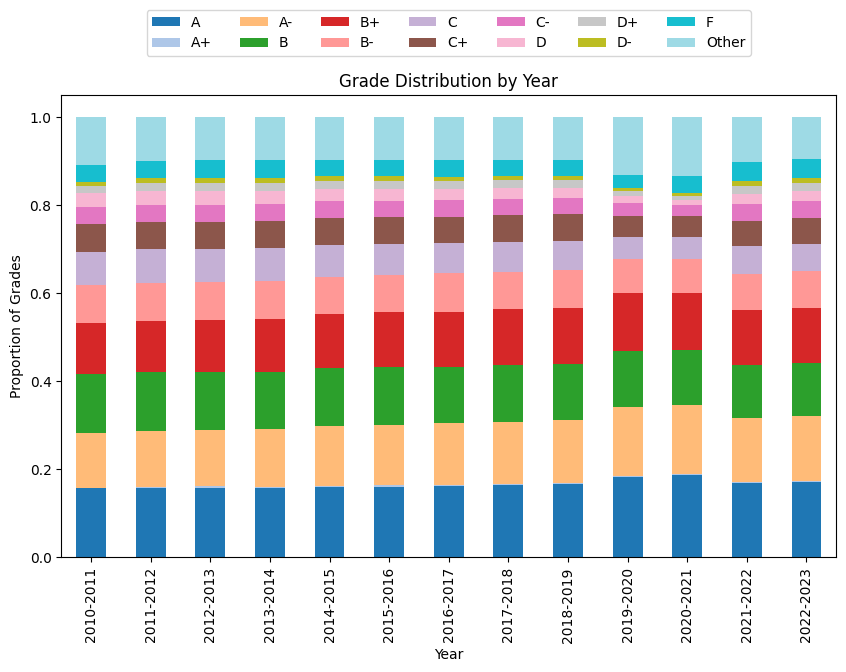

In [112]:
grades_by_year.unstack().plot(kind='bar', stacked=True, figsize=(10, 6),
                              colormap='tab20', title='Grade Distribution by Year')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=7)
plt.ylabel('Proportion of Grades')
plt.xlabel('Year')
plt.title('Grade Distribution by Year')
plt.show()

## Data Visualization
Now, we can visualize the grade distribution over time using a GIF.

MovieWriter ffmpeg unavailable; using Pillow instead.


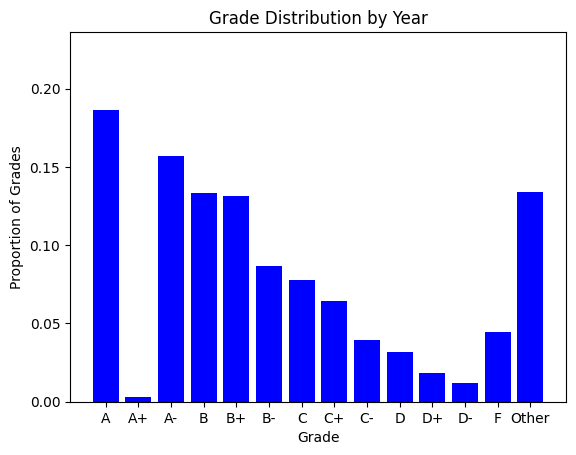

In [113]:
index = 0
n_frames = data['Year'].nunique()
plots = [data[data['Year'] == year]['Letter Grade'].value_counts(normalize=True).sort_index() for
         year in data['Year'].unique()]


# function takes frame as an input
def animation(plot):
    plt.bar(plot.index, plot.values, color='blue')


plt.ylim(top=max([plot.max() for plot in plots]) + 0.05)
plt.xlabel('Grade')
plt.ylabel('Proportion of Grades')
plt.title('Grade Distribution by Year')
anim = FuncAnimation(plt.gcf(), animation, frames=plots, interval=120)
anim.save('grades_through_time.gif')
plt.show()